<a href="https://colab.research.google.com/github/dinarrahman30/Machine-Learning-Terapan/blob/main/Predictive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informasi Data Diri
Nama: Dinar Wahyu Rahman

Username Dicoding: dinar_wahyu

Email: dinarrahman30@gmail.com

LinkedIn: [Dinar Wahyu Rahman]('https:www.linkedin.com/in/dinar-wahyu-rahman/')

Alamat: Kota Jakarta Barat, DKI Jakarta

In this Colab includes come code to get started scraping data from website. We will use package called BeautifulSoup to collect data from the web. Once, we collected data and save it into local .csv to start analysis.

Website https://www.airlinequality.com you can see a lot of data there.

# Predictive modeling of customer bookings

![British Airways](https://media.cntraveler.com/photos/577fcc03e0b5a6244f4c789c/16:9/w_2560%2Cc_limit/BritishAirways-Boeing777-AlamyF1KW8J.jpg)

## Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Understanding

Data Understanding merupakan proses memahami informasi dalam data dan menentukan kualitas dari data tersebut.

In [ ]:
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


Metode `.head()` memungkinkan kita untuk melihat 5 baris pertama dalam dataset, ini berguna untuk inspeksi visual kolom kita

## Exploratory Data Analytics (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

Dapat kita lihat dataset asli sebelum di encoding,
- Jumlah data int64 berjumlah 8, data object berjumlah 5, dan data float64 berjumlah 1

Metode `.info()` memberi kita deskripsi data, yang memberi tahu kita nama kolom, tipe datanya, dan berapa banyak nilai null yang kita miliki. Untungnya, kita tidak memiliki nilai null. Sepertinya beberapa kolom ini harus diubah menjadi tipe data yang berbeda, misalnya flight_day.

Untuk memberikan konteks lebih lanjut, berikut adalah deskripsi data yang lebih rinci, menjelaskan secara tepat apa arti setiap kolom:

- `num_passengers` = jumlah penumpang yang bepergian
- `sales_channel` = saluran penjualan tempat pemesanan dilakukan
- `trip_type` = Jenis perjalanan (Pulang Pergi, Sekali Jalan, Perjalanan Lingkaran)
- `purchase_lead` = jumlah hari antara tanggal perjalanan dan tanggal pemesanan
- `length_of_stay` = jumlah hari yang dihabiskan di tempat tujuan
- `flight_hour` = jam keberangkatan pesawat
- `flight_day` = hari keberangkatan pesawat
- `route` = rute penerbangan asal -> tujuan
- `booking_origin` = negara tempat pemesanan dilakukan
- `wants_extra_baggage` = jika pelanggan menginginkan bagasi tambahan dalam pemesanan
- `wants_preferred_seat` = jika pelanggan menginginkan kursi pilihan dalam pemesanan
- `wants_in_flight_meals` = jika pelanggan menginginkan makanan dalam pesawat dalam pemesanan
- `flight_duration` = total durasi penerbangan (dalam jam)
- `booking_complete` = tanda yang menunjukkan apakah pelanggan telah menyelesaikan pemesanan


Sebelum kita menghitung statistik apa pun pada data, mari kita lakukan konversi data yang diperlukan

In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


Metode `.describe()` memberi kita ringkasan statistik deskriptif atas keseluruhan set data (hanya berfungsi untuk kolom numerik). Ini memberi kita gambaran singkat tentang beberapa hal seperti mean, min, max, dan distribusi keseluruhan setiap kolom.

- Count adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

In [ ]:
df.shape

Dari eksekusi method df.shape Terlihat:

| Jumlah Baris	| Jumlah Kolom |
| ------ | ------ |
| 4999 |	14 |


### Check missing value

In [ ]:
# Check for missing values
print(df.isnull().sum())
print(df.isna().sum())

Tidak terdapat missing value pada dataset customer_booking.csv

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(x, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index = x.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores

,MI Scores
route,0.053495
booking_origin,0.049415
flight_duration,0.019352
wants_extra_baggage,0.013352
wants_in_flight_meals,0.004654
flight_hour,0.003436
wants_preferred_seat,0.003198
trip_type,0.003191
length_of_stay,0.002842
num_passengers,0.002652


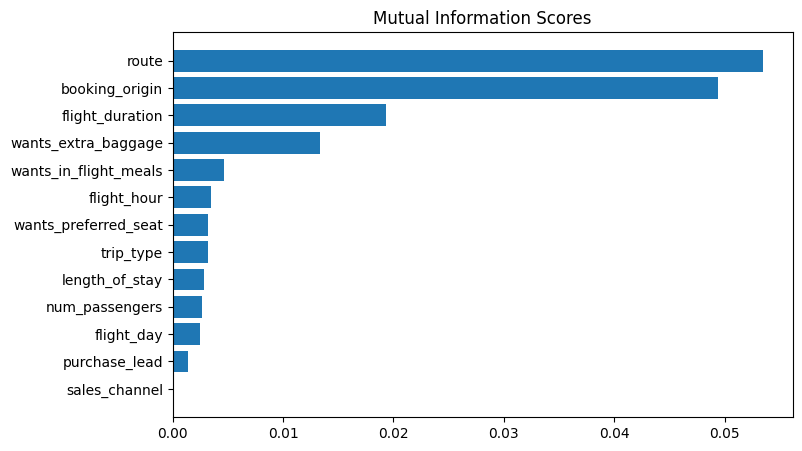

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [ ]:
# categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

# checking unique values in categorical columns
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")

sales_channel: ['Internet' 'Mobile']
trip_type: ['RoundTrip' 'CircleTrip' 'OneWay']
route: ['AKLDEL' 'AKLHGH' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL' 'AKLMRU'
 'AKLPEK' 'AKLPVG' 'AKLTPE' 'AORICN' 'AORKIX' 'AORKTM' 'AORMEL' 'BBIMEL'
 'BBIOOL' 'BBIPER' 'BBISYD' 'BDOCTS' 'BDOCTU' 'BDOHGH' 'BDOICN' 'BDOIKA'
 'BDOKIX' 'BDOMEL' 'BDOOOL' 'BDOPEK' 'BDOPER' 'BDOPUS' 'BDOPVG' 'BDOSYD'
 'BDOTPE' 'BDOXIY' 'BKICKG' 'BKICTS' 'BKICTU' 'BKIHND' 'BKIICN' 'BKIKIX'
 'BKIKTM' 'BKIMEL' 'BKIMRU' 'BKIOOL' 'BKIPEK' 'BKIPER' 'BKIPUS' 'BKIPVG'
 'BKISYD' 'BKIXIY' 'BLRICN' 'BLRMEL' 'BLRPER' 'BLRSYD' 'BOMMEL' 'BOMOOL'
 'BOMPER' 'BOMSYD' 'BTJJED' 'BTUICN' 'BTUPER' 'BTUSYD' 'BTUWUH' 'BWNCKG'
 'BWNDEL' 'BWNHGH' 'BWNIKA' 'BWNKTM' 'BWNMEL' 'BWNOOL' 'BWNPER' 'BWNSYD'
 'BWNTPE' 'CANDEL' 'CANIKA' 'CANMEL' 'CANMRU' 'CANOOL' 'CANPER' 'CANSYD'
 'CCUMEL' 'CCUMRU' 'CCUOOL' 'CCUPER' 'CCUSYD' 'CCUTPE' 'CEBMEL' 'CEBOOL'
 'CEBPER' 'CEBSYD' 'CGKCKG' 'CGKCTS' 'CGKCTU' 'CGKDEL' 'CGKHGH' 'CGKHND'
 'CGKICN' 'CGKIKA' 'CGKJED' 'CGKK

In [ ]:
# label encoding the categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int64  
 2   trip_type              50000 non-null  int64  
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  int64  
 8   booking_origin         50000 non-null  int64  
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 5.3 MB


Dapat kita lihat data yang sesuah di encoding:

- Jumlah data 1 fitur bertipe float64, 8 fitur bertipe int64, dan 5 fitur bertipe object.

## Train-test-split

In [ ]:
# drop unused columns
x = df.drop(['booking_complete'], axis=1)
y = df['booking_complete']

#changing object dtype to int dtype
for colname in x.select_dtypes("object"):
    x[colname], _ = x[colname].factorize()

In [ ]:
# test train split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Membangun machine learning model

Ada tiga algoritma model machine learning yang dicoba dan dibandingkan tingkat akurasi dari masing-masing model untuk mendapatkan hasil akurasi terbaik, yaitu

* Random Forest
* XCBoost
* Logistic Regression

### Random forest

In [ ]:
# Random Forest
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, x, y, cv=kf, scoring='accuracy')
print("Cross-validation accuracy scores:", scores)
print("Mean accuracy score:", scores.mean())

# train the model
model.fit(x_train, y_train)

# make predictions on the test set
y_pred = model.predict(x_test)

Cross-validation accuracy scores: [0.8537 0.8504 0.8488 0.8527 0.8561]
Mean accuracy score: 0.8523400000000001


In [ ]:
# Gradient Boosting Classifier (XGBoost)
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)
prediction_xgb = xgb_model.predict(x_test)
print('ACCURACY: ',accuracy_score(y_test, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_test,prediction_xgb))

ACCURACY:  85.1
AUC score:  0.5477065093262277


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(x_train, y_train)

# Predictions and evaluation
y_pred_logistic = logistic_model.predict(x_test)
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
logistic_report = classification_report(y_test, y_pred_logistic)

print("Logistic Regression Accuracy:", logistic_accuracy)
print("Logistic Regression Classification Report:\n", logistic_report)

Logistic Regression Accuracy: 0.852
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      8520
           1       0.00      0.00      0.00      1480

    accuracy                           0.85     10000
   macro avg       0.43      0.50      0.46     10000
weighted avg       0.73      0.85      0.78     10000



### Evaluate and Present Findings

In [ ]:
# Evaluasi semua model
from sklearn.metrics import accuracy_score, classification_report

all_models = {
    "Random Forest": model,
    "XGBoost": xgb_model,
    "Logistic Regression": logistic_model
}

for model_name, model in all_models.items():
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"{model_name} Accuracy: {accuracy}")
    print(f"{model_name} Classification Report:\n{report}\n")
    print("-" * 50)
    print()

Random Forest Accuracy: 0.8543
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.54      0.11      0.18      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.55      0.55     10000
weighted avg       0.82      0.85      0.81     10000


--------------------------------------------------

XGBoost Accuracy: 0.851
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.49      0.12      0.19      1480

    accuracy                           0.85     10000
   macro avg       0.68      0.55      0.55     10000
weighted avg       0.81      0.85      0.81     10000


--------------------------------------------------

Logistic Regression Accuracy: 0.852
Logistic Regression Classification Report:
              precision    recall  f1-

In [ ]:
# Feature Important
importances = all_models['Random Forest'].feature_importances_  # Use the RandomForestClassifier from all_models dictionary
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" %
          (f + 1, indices[f], importances[indices[f]]))
    print(x_train.columns[indices[f]])
    print()

Feature ranking:
1. feature 3 (0.192845)
purchase_lead

2. feature 7 (0.149148)
route

3. feature 5 (0.140716)
flight_hour

4. feature 4 (0.125112)
length_of_stay

5. feature 8 (0.110298)
booking_origin

6. feature 6 (0.091608)
flight_day

7. feature 12 (0.072816)
flight_duration

8. feature 0 (0.049482)
num_passengers

9. feature 11 (0.021780)
wants_in_flight_meals

10. feature 10 (0.017479)
wants_preferred_seat

11. feature 9 (0.015265)
wants_extra_baggage

12. feature 1 (0.011738)
sales_channel

13. feature 2 (0.001713)
trip_type



AttributeError: 'numpy.ndarray' object has no attribute 'index'